**Assignment 2**

GitHub User Name: lbelmanw

Email: livia_belman-wells@brown.edu

Worked with Angela White and Justin Voelker

In [159]:
#Import everything
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [345]:
#!/usr/bin/python
from scipy.integrate import odeint
import matplotlib.pyplot as plt # for plotting
from copy import copy


class Particle(object):

    """Class that describes particle"""
    m = 1.0

    def __init__(self, x0=np.array([1.0,1.0,1.0]), v0=np.array([0.0,0.0,0.0]),  tf = 10.0, dt = 0.001):
        
        
        self.x = x0
        self.v = v0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        

        self.tlabel = 'time (s)'
        self.xlabel = 'x (m)'
        self.vlabel = 'v (m/s)'

        npoints = int(tf/dt) # always starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x, self.v]) # NumPy array with initial position and velocity
        self.x_array = []
        self.y_array = []
        self.z_array = []
        #print("A new particle has been init'd")

    def F(self, x, v, t):
        # The force on a free particle is 0
        return np.array([0.0, -9.8*self.m, 0.0])

    def Euler_step(self): 
        """
        Take a single time step using Euler method
        """
        
        a = self.F(self.x, self.v, self.t) / self.m
        self.x += self.v * self.dt
        self.v += a * self.dt
        self.t += self.dt

    def RK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """
        a1 = self.F(self.x, self.v, self.t) / self.m
        k1 = np.array([self.v, a1])*self.dt
        
        a2 = self.F(self.x+k1[0]/2, self.v+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.v+k1[1]/2 ,a2])*self.dt
        
        a3 = self.F(self.x+k2[0]/2, self.v+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.v+k2[1]/2, a3])*self.dt
        
        a4 = self.F(self.x+k3[0], self.v+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.v+k3[1], a4])*self.dt
        
        self.x += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.v += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
        self.t += self.dt
         
        
    def Euler_trajectory(self):  
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        x_euler = []
        v_euler = []
        
        while(self.t < self.tf-self.dt/2):
            v_euler.append(self.v)
            x_euler.append(self.x)
            self.Euler_step()
        
        
        
        self.x_euler = np.array(x_euler)
        self.v_euler = np.array(v_euler)
    
    def RK4_trajectory(self): 
        """
        Loop over all time steps to construct a trajectory with RK4 method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        x_RK4 = []
        v_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            x_RK4.append(np.array([self.x[0],self.x[1],self.x[2]]))
            v_RK4.append(np.array([self.v[0],self.v[1],self.v[2]]))
            self.RK4_step()
        
        for i in range(len(x_RK4)):
            self.x_array.append(x_RK4[i][0])
            self.y_array.append(x_RK4[i][1])
            self.z_array.append(x_RK4[i][2])
                
            
            #For problems with gravity (so object stops once it hits the ground)
            if(x_RK4[i][1] > 0 or v_RK4[i][1] > 0):
                self.x_array.append(x_RK4[i][0])
                self.y_array.append(x_RK4[i][1])
                self.z_array.append(x_RK4[i][2])
             
            #For magnetic problem (since y is not up and thus can be negative)
            #if(True):
             #   self.x_array.append(x_RK4[i][0])
              #  self.y_array.append(x_RK4[i][1])
               # self.z_array.append(x_RK4[i][2])
                
            else:
                self.x_array.append(x_RK4[i-1][0])
                self.y_array.append(x_RK4[i-1][1])
                self.z_array.append(x_RK4[i-1][2])
                break
            
        
    #def scipy_trajectory(self):
     #   """calculate trajectory using SciPy ode integrator"""
        
      #  self.xv = odeint(self.derivative, self.xv0, self.)

    def derivative(self, xv, t):
        """right hand side of the differential equation
            Required for odeint """
        
        x =xv[0]
        v =xv[1]
        a = self.F(x, v, t) / self.m
        return np.ravel(np.array([v, a]))

    def results(self):
        """ 
        Print out results in a nice format
        """
        
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} x = {} v = {}'.format(self.t, self.x , self.v))
        
        if hasattr(self, 'xv'):
            print('SciPy ODE Integrator:')
            print('t = {} x = {} v = {}'.format(self.tarray[-1], self.xv[-1, 0], self.xv[-1,1]))

    def plot(self):
        """ 
        Make nice plots of our results
        """

        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111)
        
        if hasattr(self,'xv'):
            ax1.plot(self.tarray, self.xv[:, 0], "k", label = 'odeint')
            ax2.plot(self.xv[:, 0], self.xv[:, 1], "k", label = 'odeint')
        if hasattr(self,'x_euler'):
            ax1.plot(self.tarray, self.x_euler, "b", label = 'euler')
            ax2.plot(self.x_euler, self.v_euler, "b", label = 'euler')
        if hasattr(self,'x_RK4'):
            ax1.plot(self.tarray, self.x_RK4, "r", label = 'RK4')
            ax2.plot(self.x_RK4, self.v_RK4, "r", label = 'RK4')
            
        ax1.set_title('Trajectory')
        ax1.set_xlabel("t")
        ax1.set_ylabel("x")
        
        ax2.set_title('Phase space')
        ax2.set_xlabel("v")
        ax2.set_ylabel("x")

        ax1.legend()
        ax2.legend()

class FallingParticle(Particle):

    """Subclass of Particle Class that describes a falling particle"""
    g = 9.8

    def __init__(self,m = 1.0, x0 = 1.0 , v0 = 0.0, tf = 10.0,  dt = 0.1):
        self.m = m
        super().__init__(x0,v0,tf,dt)   # call initialization method of the super (parent) class
    
    def F(self, x, v, t):
            return  -self.g*self.m

**Problem 1**

In [198]:
#Part A

#Add subclasses to particle 

class DragParticle(Particle):
    
    g = np.array([0,9.8,0])
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self, m = 1.0,p0 = 1.0,T_0 = 1.0,A = 1.0,C_d = 0.5,a = 6.5*(10**-3),x0 = np.array([1.0,1.0,1.0]),v0 = np.array([0.0,0.0,0.0]),tf = 10.0, dt = 0.1):
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class
    
        self.m = m
        self.p0 = p0
        self.T_0 = T_0
        self.C_d = C_d
        self.A = A
        self.a = a
        
    def F(self, x, v, t):
        # alpha = 2.5
        p = (self.p0*((1.0-((self.a*self.x[1])/self.T_0))**2.5))
    
        return (-self.g*self.m) - (0.5*self.C_d*p*self.A*(self.v**2))

class ConstantDragParticle(Particle):
    
    g = np.array([0,9.8,0])
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self,m = 1.0,p0 = 1.0, C_d = 0.5, A = 1.0, a = 6.5*(10**-3), x0 = np.array([1.0,1.0,1.0]) , v0 = np.array([0.0,3.0,0.0]), tf = 10.0,  dt = 0.1):
        self.m = m
        self.p0 = p0
        self.C_d = C_d
        self.A = A
        self.a = a
        
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class
        
    def F(self, x, v, t):
        # alpha = 2.5
        Fd = 0.5*self.C_d*self.p0*self.A*(self.v*2)
        Fd = np.array(Fd)
        
        return  (-self.g*self.m) - Fd
        
        #return np.array(F)


(0, 2.7)

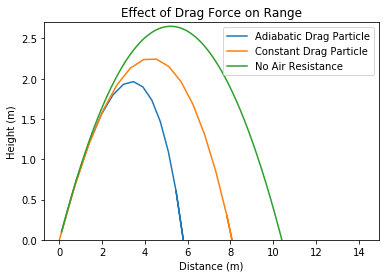

In [393]:
q = 10
l = np.pi*0.25
v = np.array([q*np.cos(l),q*np.sin(l), 0])
t_final = 2
x = np.array([0.1,0.1,0.1])
A = 0.5


drag_particle = DragParticle(A = A , x0 = x, v0 = v, tf = t_final)
drag_particle.RK4_trajectory()

constant_particle = ConstantDragParticle(A = A, x0 = np.array([0.0,0.0,0.0]), v0 = np.array([10*np.cos(np.pi*0.25),10*np.sin(np.pi*0.25), 0]), tf = t_final)
constant_particle.RK4_trajectory()

particle = Particle(x0 = np.array([0.1,0.1,0.1]), v0 = np.array([10*np.cos(np.pi*0.25),10*np.sin(np.pi*0.25), 0]), tf = t_final)
particle.RK4_trajectory()



plt.plot(drag_particle.x_array, drag_particle.y_array, label = 'Adiabatic Drag Particle')
plt.plot(constant_particle.x_array, constant_particle.y_array, label = 'Constant Drag Particle')
plt.plot(particle.x_array, particle.y_array, label = 'No Air Resistance')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Effect of Drag Force on Range')
plt.legend(loc = 1)
plt.ylim(0,2.7)

In this diagram we see that as air resistance increases there is a decrease in the range of the particle. All the particles in the graph have the same initial conditions, the only difference is what drag force each is experiencing. All the curves look similar, but adiabatic air resistance goes the shortest distance, while no air resistance goes the furthest.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply


3.84322232401 39.5


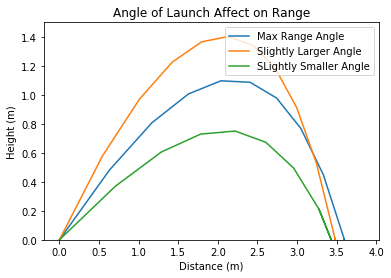

In [391]:
v = 9.0
t_final = 10.0
A = 1.0

max_range = 0
max_angle = 0
for i in range(1,900):
    angle = (np.pi*(i/10))/180
    angle_particle = DragParticle(x0 = np.array([0.0,0.0,0.0]), v0 = np.array([v*np.cos(angle),v*np.sin(angle),0.0]), tf = t_final)
    angle_particle.RK4_trajectory()
    x = max(angle_particle.x_array)
    if(x > max_range):
        max_range = x
        max_angle = (i/10)
        
angle_particle = DragParticle(x0 = np.array([0.0,0.0,0.0]), v0 = np.array([v*np.cos((max_angle*np.pi)/180),v*np.sin((max_angle*np.pi)/180),0.0]), tf = t_final)
angle_particle.RK4_trajectory()
plt.plot(angle_particle.x_array, angle_particle.y_array, label = 'Max Range Angle')

angle_particle = DragParticle(x0 = np.array([0.0,0.0,0.0]), v0 = np.array([v*np.cos(((max_angle+10)*np.pi)/180),v*np.sin(((max_angle+10)*np.pi)/180),0.0]), tf = t_final)
angle_particle.RK4_trajectory()
plt.plot(angle_particle.x_array, angle_particle.y_array, label = 'Slightly Larger Angle')

angle_particle = DragParticle(x0 = np.array([0.0,0.0,0.0]), v0 = np.array([v*np.cos(((max_angle-10)*np.pi)/180),v*np.sin(((max_angle-10)*np.pi)/180),0.0]), tf = t_final)
angle_particle.RK4_trajectory()
plt.plot(angle_particle.x_array, angle_particle.y_array, label = 'SLightly Smaller Angle')


plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Angle of Launch Affect on Range')
plt.legend(loc = 1)      
plt.ylim(0,1.5)


    
print(max_range, max_angle)

In these graphs all of the particles have the adiabatic model for air density. In addition each has the same initial velocity, what differs is the launch angle. The blue line is the angle calculated to result in the max range by the for loop which loops at angles from 0 to 90 degreese. The interesting part which can be seen in the printout above the graph is that the max range occurs at 39 degrees. This is less than a no drag force problem (which has angle 45 degrees) as now there must be additional initial velocity in the x direction as the drag force slows the particle down.

In [166]:
class VariableGrav(Particle):
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self, m = 1.0,p0 = 1.0,T_0 = 1.0,A = 1.0,C_d = 0.5,a = 6.5*(10**-3),x0 = np.array([1.0,1.0,1.0]),v0 = np.array([0.0,0.0,0.0]),tf = 10.0, dt = 0.1):
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class
        
        self.m = m
        
    def F(self, x, v, t):
        # alpha = 2.5
        v = (-3.99*(10**14))/(((6.371*(10**6))+self.x[1])**2)
        
        return np.array([0,v*self.m,0])


A new particle has been init'd


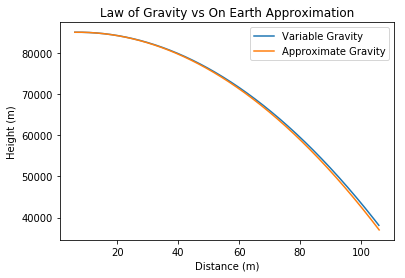

In [400]:
v = np.array([1.0, 10.0,5.0])
t_final = 100.0
x = np.array([6.0,85*1000,2.0])


variable_grav = VariableGrav(m = 1, x0 = x, v0 = v, tf = t_final)
variable_grav.RK4_trajectory()

v = np.array([1.0, 10.0,5.0])
t_final = 100.0
x = np.array([6.0,85*1000,2.0])

particle = Particle(x0 = x, v0 = v, tf = t_final)
particle.RK4_trajectory()

plt.plot(variable_grav.x_array, variable_grav.y_array, label = 'Variable Gravity')
plt.plot(particle.x_array, particle.y_array, label = 'Approximate Gravity')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Law of Gravity vs On Earth Approximation')
plt.legend(loc =1)


**Question 2**

In this problem we explored the variability of gravity by launching two particles from the top of the mesosphere (85 km), one where gravity was calcualted based on the equation for the force of gravity everywhere in the universe, and one where gravity was calculated using an Earth approximation. We can see that the lines slightly diverge and that the variable gravity one falls slightly slower (which makes sense as farther from the Earth gravity is weaker), but we also see that this difference is miniscule. Thus the approxiamtion is quite effective.

**Problem 2**

In [313]:
class DragParticle2(Particle):
    
    g = np.array([0.0,9.8,0.0])
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self, m = 1.0,p0 = 1.0,T_0 = 1.0,A = 0.1,C_d = 0.5,a = 6.5*(10**-3),x0 = np.array([1.0,1.0,1.0]),v0 = np.array([0.0,0.0,0.0]),tf = 10.0, dt = 0.1, w = np.array([0,0,-50]), r = 0.25):
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class
        
        self.m = m
        self.p0 = p0
        self.T_0 = T_0
        self.C_d = C_d
        self.A = A
        self.a = a
        self.w = w
        self.r = r
        
        self.ForceDrag = []
        self.W = [0]
        self.E = []
        self.v2 = []
        
    def F(self, x, v, t):
        # alpha = 2.5
        p = self.p0
        Fd = [0,0,0]
        X = (self.v-10)/4
        for i in range(0,3):
            if(X[i]>0):
                d = np.exp(-(X[i]**2)/4)
                Cd = .25 + (.25/(1+np.exp(X[i]))) - .16*d
                Fd[i] = 0.5*Cd*p*self.A*(self.v[i]**2)
            else:
                d = np.exp(-(X[i]**2))
                Cd = .25 + (.25/(1+np.exp(X[i]))) - .16*d
                Fd[i] = 0.5*Cd*p*self.A*(self.v[i]**2)
        Fd = np.array(Fd) 
        
        #Work + Energy
        self.ForceDrag.append(Fd)
        self.v2.append(np.sum(self.v**2))
    
        
        #Find lift
        S = (self.r*np.sqrt(np.sum(self.w**2)))/np.sqrt(np.sum(self.v**2))
        Cl = 0.5*(S**0.4)
        Fm = ((0.5*Cl*self.p0*self.A*self.r)/S)*np.cross(self.w,self.v)
        
        return  (-self.g*self.m) - Fd + Fm
    
    def Work(self):
        work = 0
        for i in range(1, len(self.x_array)):
            #Distance
            dx = self.x_array[i] - self.x_array[i-1]
            dy = self.y_array[i] - self.y_array[i-1]
            dz = self.z_array[i] - self.z_array[i-1]
            dist = np.array([dx,dy,dz])
            
            #Get drag force
            Fd = self.ForceDrag[i]
            
            work += np.dot(Fd,dist)
            
            self.W.append(work)
            
        return self.W
    
    def Energy(self):
        for i in range(0, len(self.x_array)):
            kinetic = 0.5*self.m*(self.v2[i])
            potential = self.m*9.8*self.y_array[i]
            self.E.append(kinetic+potential)
            
        return self.E

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


(0, 150)

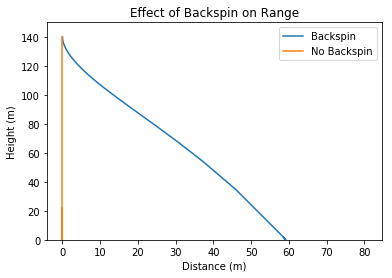

In [405]:
#Part A

v = np.array([0.0,1.0,0])
t_final = 50
x = np.array([0.0,140.0,0])


particle2 = DragParticle2(m = 0.625, x0 = x, v0 = v, tf = t_final, w = np.array([0.0,0.0,50.0]))
particle2.RK4_trajectory()

particle3 = DragParticle(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([0.0,1.0,0]), tf = 5.0)
particle3.RK4_trajectory()


plt.plot(particle2.x_array, particle2.y_array, label = 'Backspin')
plt.plot(particle3.x_array, particle3.y_array, label = 'No Backspin')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Effect of Backspin on Range')
plt.legend(loc = 1)      
plt.ylim(0,150)

In this problem we have reasonably estimated the height of the dam, and the weight and radius of the basketball. We have then "dropped" our basketball of the dam twice, once with backspin. As can be seen in the graph there is a significant difference between the two drops, with backspin having significantly more range.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2

(0, 150)

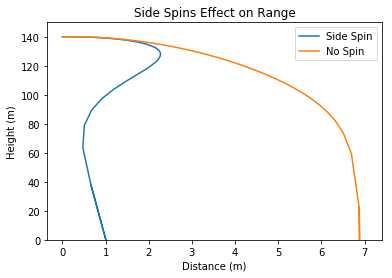

In [409]:
#Part B

t_final = 20

particle2 = DragParticle2(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([2.0,1.0,0]), tf = 20, w = np.array([0.0,1000.0/(2*np.pi*0.25),0.0]))
particle2.RK4_trajectory()

particle3 = DragParticle(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([2.0,1.0,0]), tf = 5.0)
particle3.RK4_trajectory()


plt.plot(particle2.x_array, particle2.y_array, label = 'Side Spin')
plt.plot(particle3.x_array, particle3.y_array, label = 'No Spin')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Side Spins Effect on Range')
plt.legend(loc = 1)      
plt.ylim(0,150)

Similar to part A we explore spin here dropping the same hypothetical basketball of the same dam. The difference is that here we throw the ball giving it forward momentum, and we give the spinning ball side spin, not back spin. The other big difference is that here spin doesn't help with range. Instead the ball with spin travels a shorter distance and even doubles back on itself.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


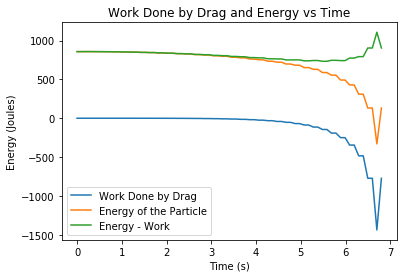

In [411]:
v = np.array([0.0,1.0,0])
t_final = 6.8
x = np.array([0.0,140.0,0])


particle2 = DragParticle2(m = 0.625, x0 = x, v0 = v, tf = t_final, w = np.array([0.0,0.0,50.0]))
particle2.RK4_trajectory()
particle2.Work()
particle2.Energy()

value = np.array(particle2.E) - np.array(particle2.W)
plt.plot(particle2.tarray, particle2.W, label = 'Work Done by Drag')
plt.plot(particle2.tarray, particle2.E, label = 'Energy of the Particle')
plt.plot(particle2.tarray, value, label = 'Energy - Work')


plt.xlabel('Time (s)')
plt.ylabel('Energy (Joules)')
plt.title('Work Done by Drag and Energy vs Time')
plt.legend(loc = 3)      

In this part of problem 2 we are looking at work done by thh drag force and energy.We can see that teh shapes of the energy and work curves are quite similar, and that Energy - Work is almost constant. These both makes sense as we know that the drag force is remvoing energy from the system and thus $W_{d} = E_{final} - E_{initial}$. It is also not too troublesome that the Work - Energy curve isn't exactly constant for two reasons. One, there is a second force in there, due to the spin of the particle, that will change the energy of the particle. Two, the weirdness of the end values is due to the simulation cutting off as the particle hits the ground (and specifically my contingencies).

In [187]:
class ChangingRotation(Particle):
    
    g = np.array([0.0,9.8,0.0])
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self, m = 1.0,p0 = 1.0,T_0 = 1.0,A = 0.1,C_d = 0.5,a = 6.5*(10**-3),x0 = np.array([1.0,1.0,1.0]),v0 = np.array([0.0,0.0,0.0]),tf = 10.0, dt = 0.1, w = np.array([0,0,-50]), r = 0.25, c = 1.0):
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class

        self.m = m
        self.p0 = p0
        self.T_0 = T_0
        self.C_d = C_d
        self.A = A
        self.a = a
        self.w_initial = w
        self.w = w
        self.r = r
        self.c = c
        
    def F(self, x, v, t):
        # alpha = 2.5
        p = self.p0
        Fd = [0,0,0]
        X = (self.v-10)/4
        for i in range(0,3):
            if(X[i]>0):
                d = np.exp(-(X[i]**2)/4)
                Cd = .25 + (.25/(1+np.exp(X[i]))) - .16*d
                Fd[i] = 0.5*Cd*p*self.A*(np.sqrt(np.sum(self.v**2)))*self.v[i]
            else:
                d = np.exp(-(X[i]**2))
                Cd = .25 + (.25/(1+np.exp(X[i]))) - .16*d
                Fd[i] = 0.5*Cd*p*self.A*(np.sqrt(np.sum(self.v**2)))*self.v[i]
        Fd = np.array(Fd) 
        
        #Find new angular velocity
        self.w = self.w_initial*np.exp(((-5.0*self.c)/(2.0*self.m*(self.r**2.0)))*self.t)
        
        #Find lift
        S = (self.r*np.sqrt(np.sum(self.w**2)))/np.sqrt(np.sum(self.v**2))
        Cl = 0.5*(S**0.4)
        Fm = ((0.5*Cl*self.p0*self.A*self.r)/S)*np.cross(self.w,self.v)

        
        return  (-self.g*self.m) - Fd + Fm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


A new particle has been init'd
A new particle has been init'd


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


(0, 145)

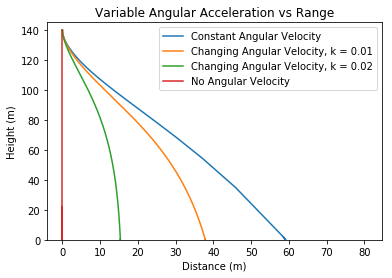

In [414]:
#Part D

v = np.array([0.0,1.0,0])
t_final = 50
x = np.array([0.0,140.0,0])

particle1 = DragParticle2(m = 0.625, x0 = x, v0 = v, tf = t_final, w = np.array([0.0,0.0,50.0]))
particle1.RK4_trajectory()

particle2 = ChangingRotation(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([0.0,1.0,0]), tf = 50, w = np.array([0.0,0.0,50.0]), c = 0.01)
particle2.RK4_trajectory()

particle4 = ChangingRotation(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([0.0,1.0,0]), tf = 50, w = np.array([0.0,0.0,50.0]), c = 0.02)
particle4.RK4_trajectory()

particle3 = DragParticle(m = 0.625, x0 = np.array([0.0,140.0,0]), v0 = np.array([0.0,1.0,0]), tf = 5.0)
particle3.RK4_trajectory()

plt.plot(particle1.x_array, particle1.y_array, label = 'Constant Angular Velocity')
plt.plot(particle2.x_array, particle2.y_array, label = 'Changing Angular Velocity, k = 0.01')
plt.plot(particle4.x_array, particle4.y_array, label = 'Changing Angular Velocity, k = 0.02')
plt.plot(particle3.x_array, particle3.y_array, label = 'No Angular Velocity')


plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Variable Angular Acceleration vs Range')
plt.legend(loc = 1)      
plt.ylim(0,145)

In the final part of two we explore how changing angular velocity affects range. If torque is proportional to angular velocity we find $$kw = Ia = I\frac{dw}{dt}$$ where k is some constant, and I is the moment of inertia of the particle $I = \frac{2}{5}MR^2$. Since this EQ is seperable we can solve it to find $$w = w_{0}e^{\frac{-5kt}{2MR^2}}$$ We can modify our program to take this change into account and make a graoh comparing no change in angular velocity to change and no angular velocity. What we find is pretty expected. An angular velocity that decreases with time results in a range between that of no change and that of no angular velocity. In addition we see that the larger k is the faster the angular velocity disappears and the shorter the range.

In [367]:
class Magnetic(Particle):
    g = np.array([0,9.8,0])
    
    #T_0 is temp at time 0, can set otherwise (same for A)
    def __init__(self, m = 1.0, q = 0.01, opening = 500*(10**-6), distance = 3/10, magnetic = np.array([0.0,0.0,100.0]), x0 = np.array([0.25,0.0,0.0]),v0 = np.array([0.0,0.4,0.0]),tf = 10.0, dt = 0.1):
        super().__init__(x0,v0,tf,dt) #initialize other items with parent class
    
        self.m = m
        self.q = q
        self.opening = opening
        self.distance = distance
        self.magnetic = magnetic
        
    def F(self, x, v, t):
        # alpha = 2.5
        if(0 < self.x[0] < 0.50 and 0 < self.x[1] < 0.50):
            #Magnetic force
            F = self.q*np.cross(self.v,self.magnetic)
        else:
            F = np.array([0,0,0])       
            
        return F

Text(0,0.5,'y position (m)')

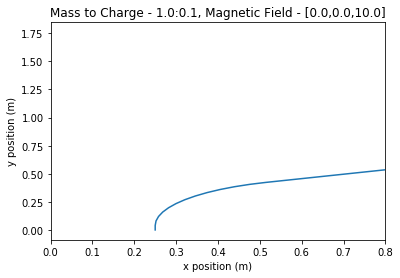

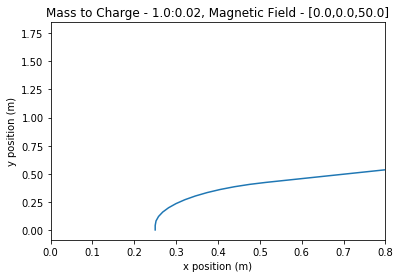

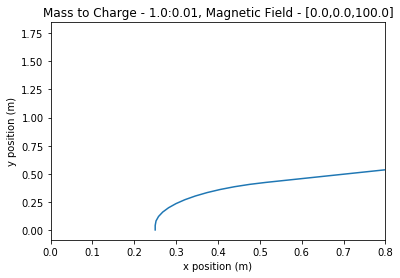

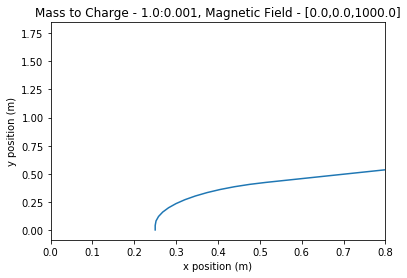

In [385]:
particlem2 = Magnetic(q = 0.1, magnetic = np.array([0.0,0.0,10.0]), x0 = np.array([0.25,0.0,0.0]), v0 = np.array([0.0,0.4,0.0]))
particlem2.RK4_trajectory()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(particlem2.x_array,particlem2.y_array)
plt.xlim(0,0.80)
plt.title('Mass to Charge - 1.0:0.1, Magnetic Field - [0.0,0.0,10.0]')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')

particlem2 = Magnetic(q = 0.02, magnetic = np.array([0.0,0.0,50.0]), x0 = np.array([0.25,0.0,0.0]), v0 = np.array([0.0,0.4,0.0]))
particlem2.RK4_trajectory()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.plot(particlem2.x_array,particlem2.y_array)
plt.xlim(0,0.80)
plt.title('Mass to Charge - 1.0:0.02, Magnetic Field - [0.0,0.0,50.0]')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')


particlem2 = Magnetic(q = 0.01, magnetic = np.array([0.0,0.0,100.0]), x0 = np.array([0.25,0.0,0.0]), v0 = np.array([0.0,0.4,0.0]))
particlem2.RK4_trajectory()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.plot(particlem2.x_array,particlem2.y_array)
plt.xlim(0,0.80)
plt.title('Mass to Charge - 1.0:0.01, Magnetic Field - [0.0,0.0,100.0]')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')


particlem2 = Magnetic(q = 0.001, magnetic = np.array([0.0,0.0,1000.0]), x0 = np.array([0.25,0.0,0.0]), v0 = np.array([0.0,0.4,0.0]))
particlem2.RK4_trajectory()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.plot(particlem2.x_array,particlem2.y_array)
plt.xlim(0,0.80)
plt.title('Mass to Charge - 1.0:0.001, Magnetic Field - [0.0,0.0,1000.0]')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')

$$F = q(vxB) = q(bv_{y}i - bv_{x}j)$$
We can write the force this way as we know E = 0 and that the magnetic force is only in the z-direction

If we write the forces out component wise we get: $$F_{x} = - qbv_{x}j$$ $$F_{y} = qbv_{y}i$$
By taking the derivative with respect to x of one of these equations, and plugging it into the other we find: $$\frac{d^2V_{x}}{dx^2} + (\frac{qb}{m})^2V_{x}=0$$ (We get an equivalent equation for the one direction)

Since this is the wave EQ we already know the answer: $$V_{x}=Asin(\frac{qb}{m}x-c)$$ where A and c are determined by initial conditions. In this case though we don't really care what A and c are though, what we care about is $\frac{qb}{m}$ as this lets us know that in order to get the same behaviour of a particle (in this case in order to get a particle to reach the detector) as we adjust the mass charge ratio we must adjust the strength of the magnetic field in the same manner. Hence the increasing B field as the charge q decreases (which increases the ratio since m is static).

